## WORKFLOW FOR NETFLIX PROJECT

**Step 1: Load and Inspect the Dataset**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("netflix1.csv")
print(data.head())
print(data.info())


  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

**Step 2: Clean the Data (DataCleaning3)**

In [42]:
print(data.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')


In [43]:
print(data.head())


  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [44]:
subset_columns = ['director', 'cast', 'country']
existing_columns = [col for col in subset_columns if col in data.columns]
data.dropna(subset=existing_columns, inplace=True)


In [45]:
data.fillna({'cast': 'Unknown'}, inplace=True)


**Step 3: Netflix Dataset EDA (Exploratory Data Analysis)**

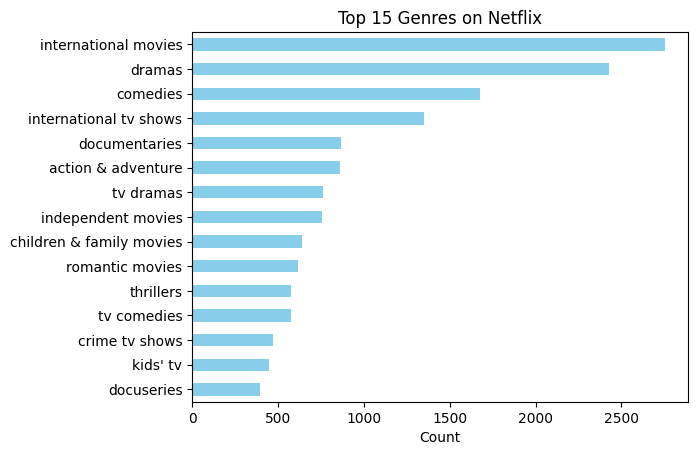

In [46]:
# Split genres and count frequencies
from collections import Counter
genre_series = data['listed_in'].dropna().apply(lambda x: x.split(', '))
genres_flat = [genre.strip().lower() for sublist in genre_series for genre in sublist]
genre_counts = pd.Series(Counter(genres_flat)).sort_values(ascending=False).head(15)
genre_counts.plot(kind='barh', color='skyblue')
plt.title("Top 15 Genres on Netflix")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.show()


<Axes: ylabel='count'>

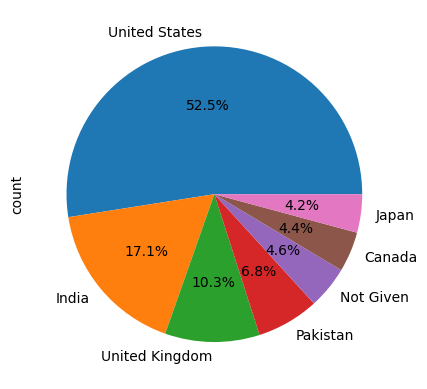

In [47]:
data_country = data.country.value_counts()
data_country[:7].plot(kind = 'pie',autopct ='%1.1f%%')

<Axes: ylabel='count'>

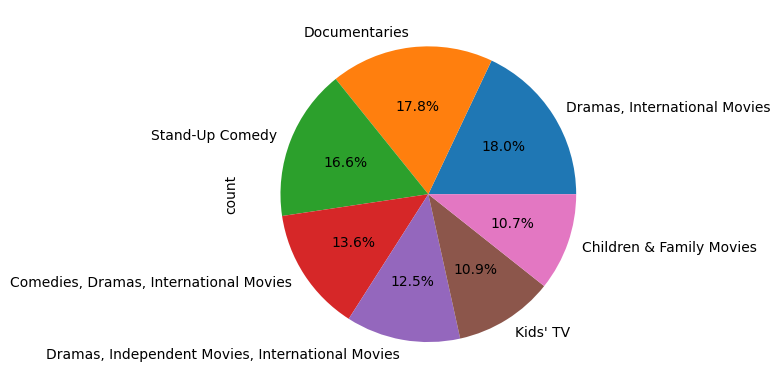

In [48]:
data_list= data.listed_in.value_counts()
data_list[:7].plot(kind = 'pie',autopct ='%1.1f%%')

**UNIVARIATE ANALISYS**

In [49]:
df = pd.read_csv("netflix1.csv")  # Replace with your actual file path


In [50]:
palette = sns.color_palette("coolwarm", n_colors=df['release_year'].nunique())


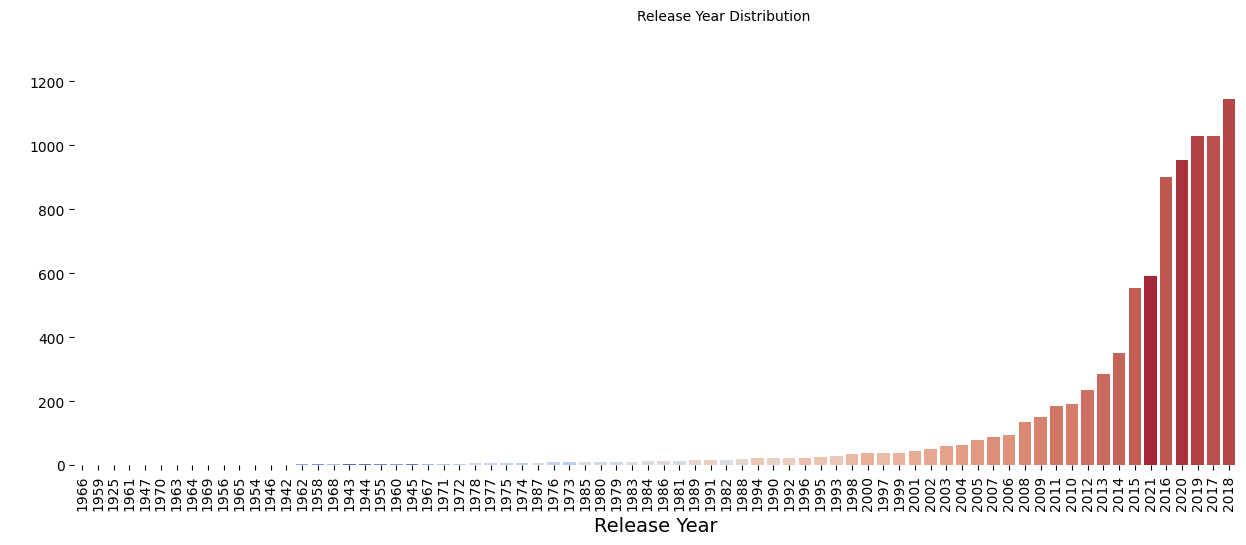

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data=df, x='release_year', hue='release_year', ax=ax, order=df['release_year'].value_counts(ascending=True).index, palette=palette, legend=False)

ax.set_xlabel(xlabel='Release Year', size=14)
ax.set_ylabel(ylabel=" ")
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90)
fig.text(0.5, 1,"Release Year Distribution")
plt.show()

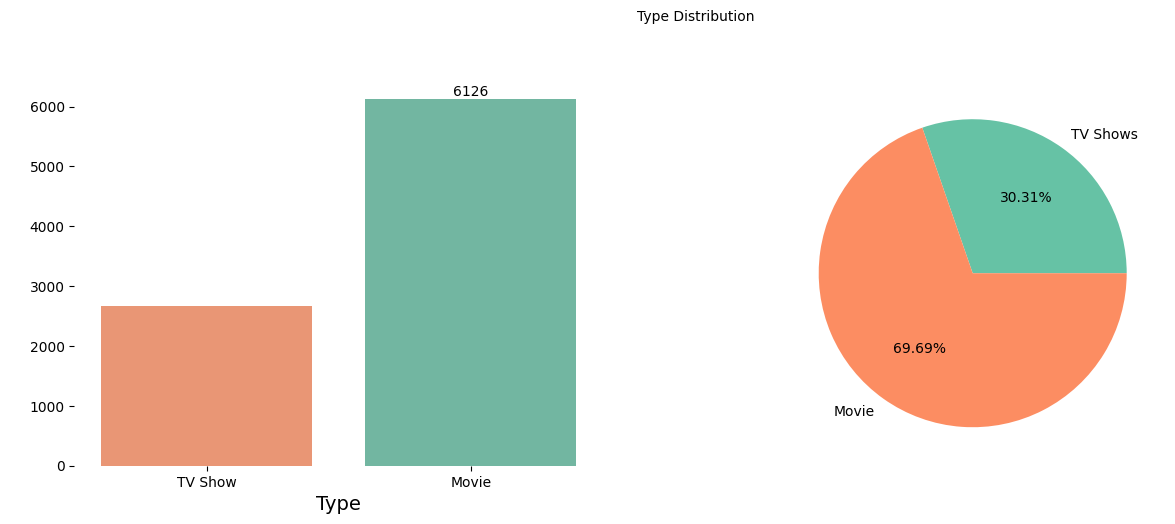

In [52]:
palette = sns.color_palette("Set2", n_colors=2)  # Ensure only 2 colors are used

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(data=df, x='type', hue='type', ax=ax[0], order=df['type'].value_counts(ascending=True).index, palette=palette, legend=False)

ax[0].set_xlabel(xlabel='Type', size=14)
ax[0].set_ylabel(ylabel=" ")
ax[0].bar_label(ax[0].containers[0])
sns.despine(bottom=True, left=True)
df['type'].value_counts(ascending=True).plot(kind='pie',ax=ax[1],autopct="%.2f%%",colors=palette,labels=['TV Shows','Movie'])
ax[1].set_xlabel(xlabel=" ")
ax[1].set_ylabel(ylabel=" ")
fig.text(0.5, 1,"Type Distribution")
plt.show()

**MULTIVARIATE ANALISYS: Type by added year** 

In [53]:
print(df['date_added'].dtype)
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

object


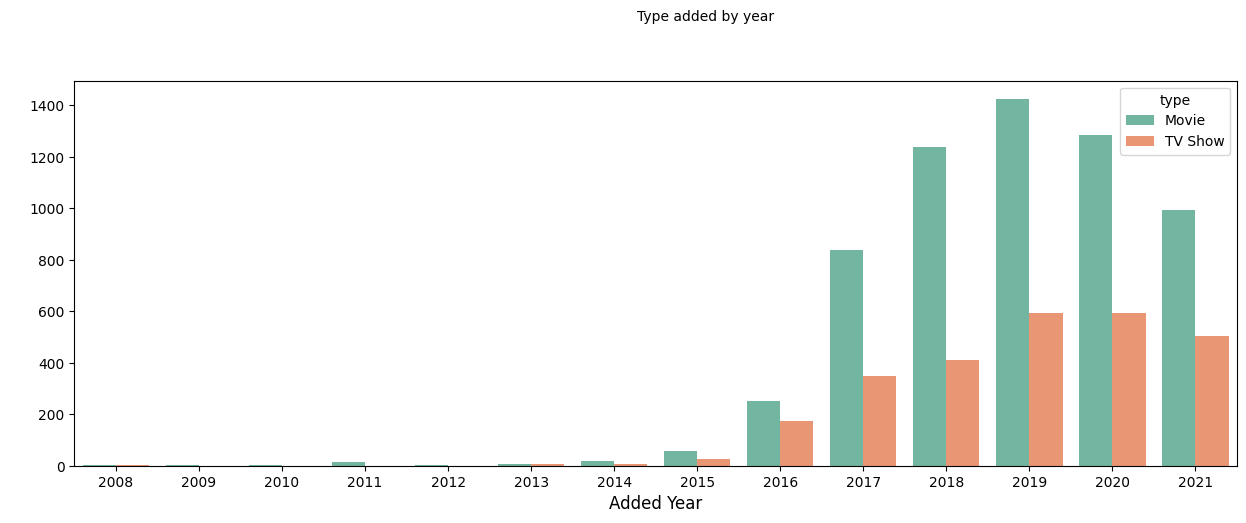

In [54]:

fig, ax = plt.subplots(1, 1, figsize=(15, 5))
# Ensure 'year_added' is defined before copying
df['year_added'] = df['date_added'].dt.year  
df_year_added = df[['year_added', 'type']]
# Use the correct dataframe for plotting
sns.countplot(data=df_year_added, x='year_added', hue='type', palette=palette)
ax.set_xlabel(xlabel='Added Year', size=12)
ax.set_ylabel(ylabel=' ')
fig.text(0.5, 1, "Type added by year")
plt.show()


# GENRES ANALISYS

In [55]:
def get_secondary_genre(text):
    if len(text.split(","))>1:
        secondary= text.split(",")[1].strip()
    else:
        secondary = text.split(",")[0].strip()
    return secondary
    
    
df['main_genre']= df['listed_in'].apply(lambda x: x.split(",")[0])
df['secondary_genre']= df['listed_in'].apply(lambda x: get_secondary_genre(x))

df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,main_genre,secondary_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,Documentaries,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,Crime TV Shows,International TV Shows
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,TV Dramas,TV Horror
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,Children & Family Movies,Comedies
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,Dramas,Independent Movies


**MAPPING GENRES**

In [56]:
mapping_genres_dict ={'Documentaries':'Documentaries',
     'British TV Shows': 'International',
     'International TV Shows':'International', 
     'Crime TV Shows':'Crime',
    'Docuseries':'Documentaries', 
     'TV Dramas':'Dramas', 
     'Children & Family Movies':'Children & Family Movies', 
     'Dramas':'Dramas',
     'Comedies':'Comedies', 
     'TV Comedies':'Comedies', 
     'Thrillers':'Thrillers',
     'TV Thrillers':'Thrillers',
     'Horror Movies':'Horror', 
     "Kids' TV":"Kids' TV", 
     'Action & Adventure':'Action & Adventure', 
     'Reality TV':'Reality TV',
     'Anime Series':'Anime', 
     'International Movies':'International', 
     'Sci-Fi & Fantasy':'Sci-Fi & Fantasy',
       'Classic Movies':'Classic', 
     'TV Shows':'TV Shows', 
     'Stand-Up Comedy':'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure':'Action & Adventure', 
     'Movies':'Movies', 
     'Korean TV Shows':'International',
     'Stand-Up Comedy & Talk Shows':'Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV':'Classic', 
     'Anime Features':'Anime', 
       'Cult Movies':'Cult', 
     'Classic Movies':'Classic',
     'Independent Movies':'Independent Movies', 
     'TV Horror':'Horror',
        'Music & Musicals':'Music & Musicals', 
       'LGBTQ Movies':'LGBTQ', 
     'Sports Movies':'Sport',
          'Spanish-Language TV Shows':'International',
         'Romantic TV Shows':'Romantic',
         'Romantic Movies':'Romantic',
         'TV Action & Adventure':'Action & Adventure',
         'TV Sci-Fi & Fantasy': 'Sci-Fi & Fantasy',
      'International TV Shows':'International',
     'Faith & Spirituality':'Faith & Spirituality',
      'Science & Nature TV':'Science & Nature'
                     }

df['main_genre']=df['main_genre'].map(mapping_genres_dict)
df['secondary_genre']=df['secondary_genre'].map(mapping_genres_dict)
df['main_genre'].value_counts()

main_genre
Dramas                          1666
Comedies                        1329
International                   1155
Documentaries                   1049
Action & Adventure               898
Children & Family Movies         605
Crime                            399
Kids' TV                         385
Stand-Up Comedy & Talk Shows     368
Horror                           286
Anime                            195
Reality TV                       120
Classic                          100
Thrillers                         65
Movies                            53
Romantic                          35
Independent Movies                20
Music & Musicals                  18
TV Shows                          16
Sci-Fi & Fantasy                  14
Cult                              12
LGBTQ                              1
Sport                              1
Name: count, dtype: int64

In [57]:
df.loc[df['main_genre']=='LGBTQ']
df.loc[df['main_genre'] == 'LGBTQ', ['main_genre']] = df[df['main_genre'] == 'LGBTQ']['secondary_genre']
df.loc[df['main_genre'] == 'Cult', ['main_genre']] = df[df['main_genre'] == 'Cult']['secondary_genre']
df.loc[df['main_genre'] == 'Sport', ['main_genre']] = df[df['main_genre'] == 'Sport']['secondary_genre']
df.loc[df['main_genre'] == 'Independent Movies', ['main_genre']] = df[df['main_genre'] == 'Independent Movies']['secondary_genre']


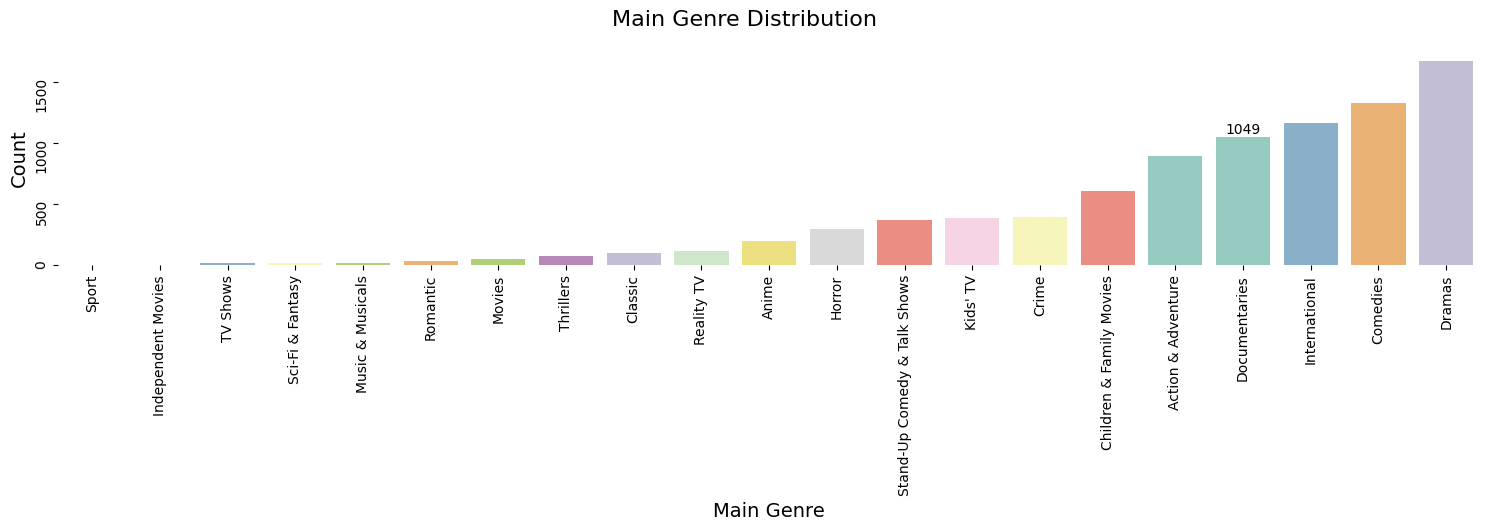

In [58]:
# Create a longer palette
palette = sns.color_palette('Set3', n_colors=df['main_genre'].nunique())
# Create countplot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(data=df, x='main_genre', hue='main_genre', legend=False, ax=ax,
              order=df['main_genre'].value_counts(ascending=True).index, palette=palette)
# Labeling
ax.set_xlabel("Main Genre", size=14)
ax.set_ylabel("Count", size=14)
ax.bar_label(ax.containers[0])
sns.despine(bottom=True, left=True)
ax.tick_params(labelrotation=90)
fig.text(0.5, 1.02, "Main Genre Distribution", ha='center', fontsize=16)
plt.tight_layout()
plt.show()


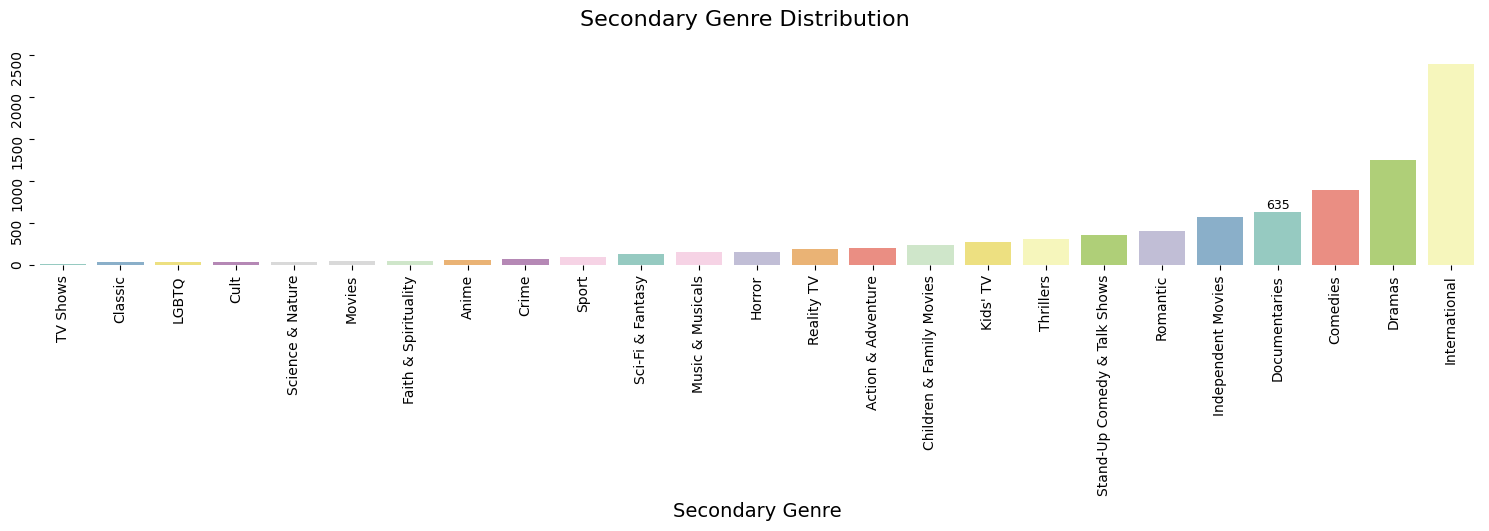

In [59]:
# Ensure enough colors for all unique secondary genres
n_colors = df['secondary_genre'].nunique()
palette = sns.color_palette('Set3', n_colors=n_colors)
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sns.countplot(
    data=df,
    x='secondary_genre',
    hue='secondary_genre',         # Fix FutureWarning
    legend=False,                  # Suppress extra legend
    ax=ax,
    order=df['secondary_genre'].value_counts(ascending=True).index,
    palette=palette
)
# Customize axes and labels
ax.set_xlabel('Secondary Genre', size=14)
ax.set_ylabel('', size=14)
ax.bar_label(ax.containers[0], fontsize=9)
sns.despine(bottom=True, left=True)
ax.tick_params(labelrotation=90)
# Add title
fig.text(0.5, 1.02, "Secondary Genre Distribution", ha='center', fontsize=16)
plt.tight_layout()
plt.show()


# WordCloud Representation

**Step 4: Netflix-Show-Data Visualization**

In [60]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
!pip install wordcloud



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


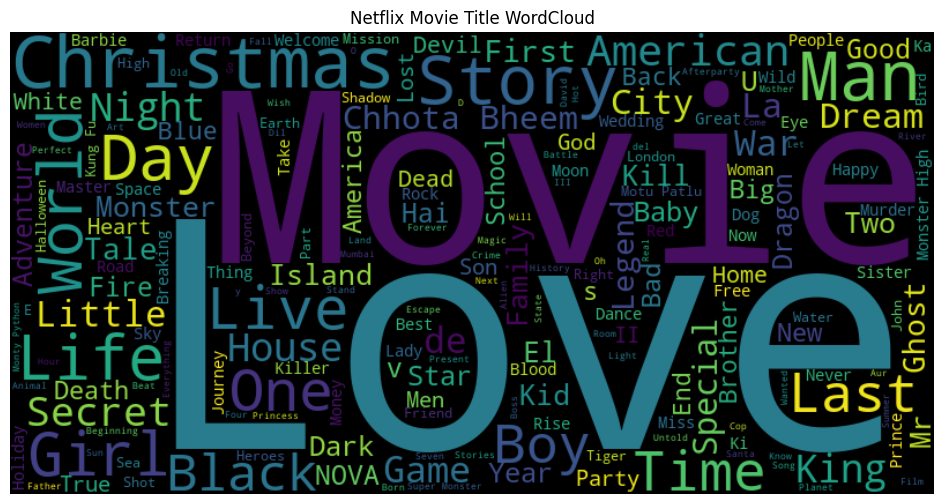

In [62]:
from wordcloud import WordCloud

titles = ' '.join(data[data['type'] == 'Movie']['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Movie Title WordCloud')
plt.show()


# WordCloud Representation by Genres

In [63]:
print(df.columns)


Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'year_added',
       'main_genre', 'secondary_genre'],
      dtype='object')


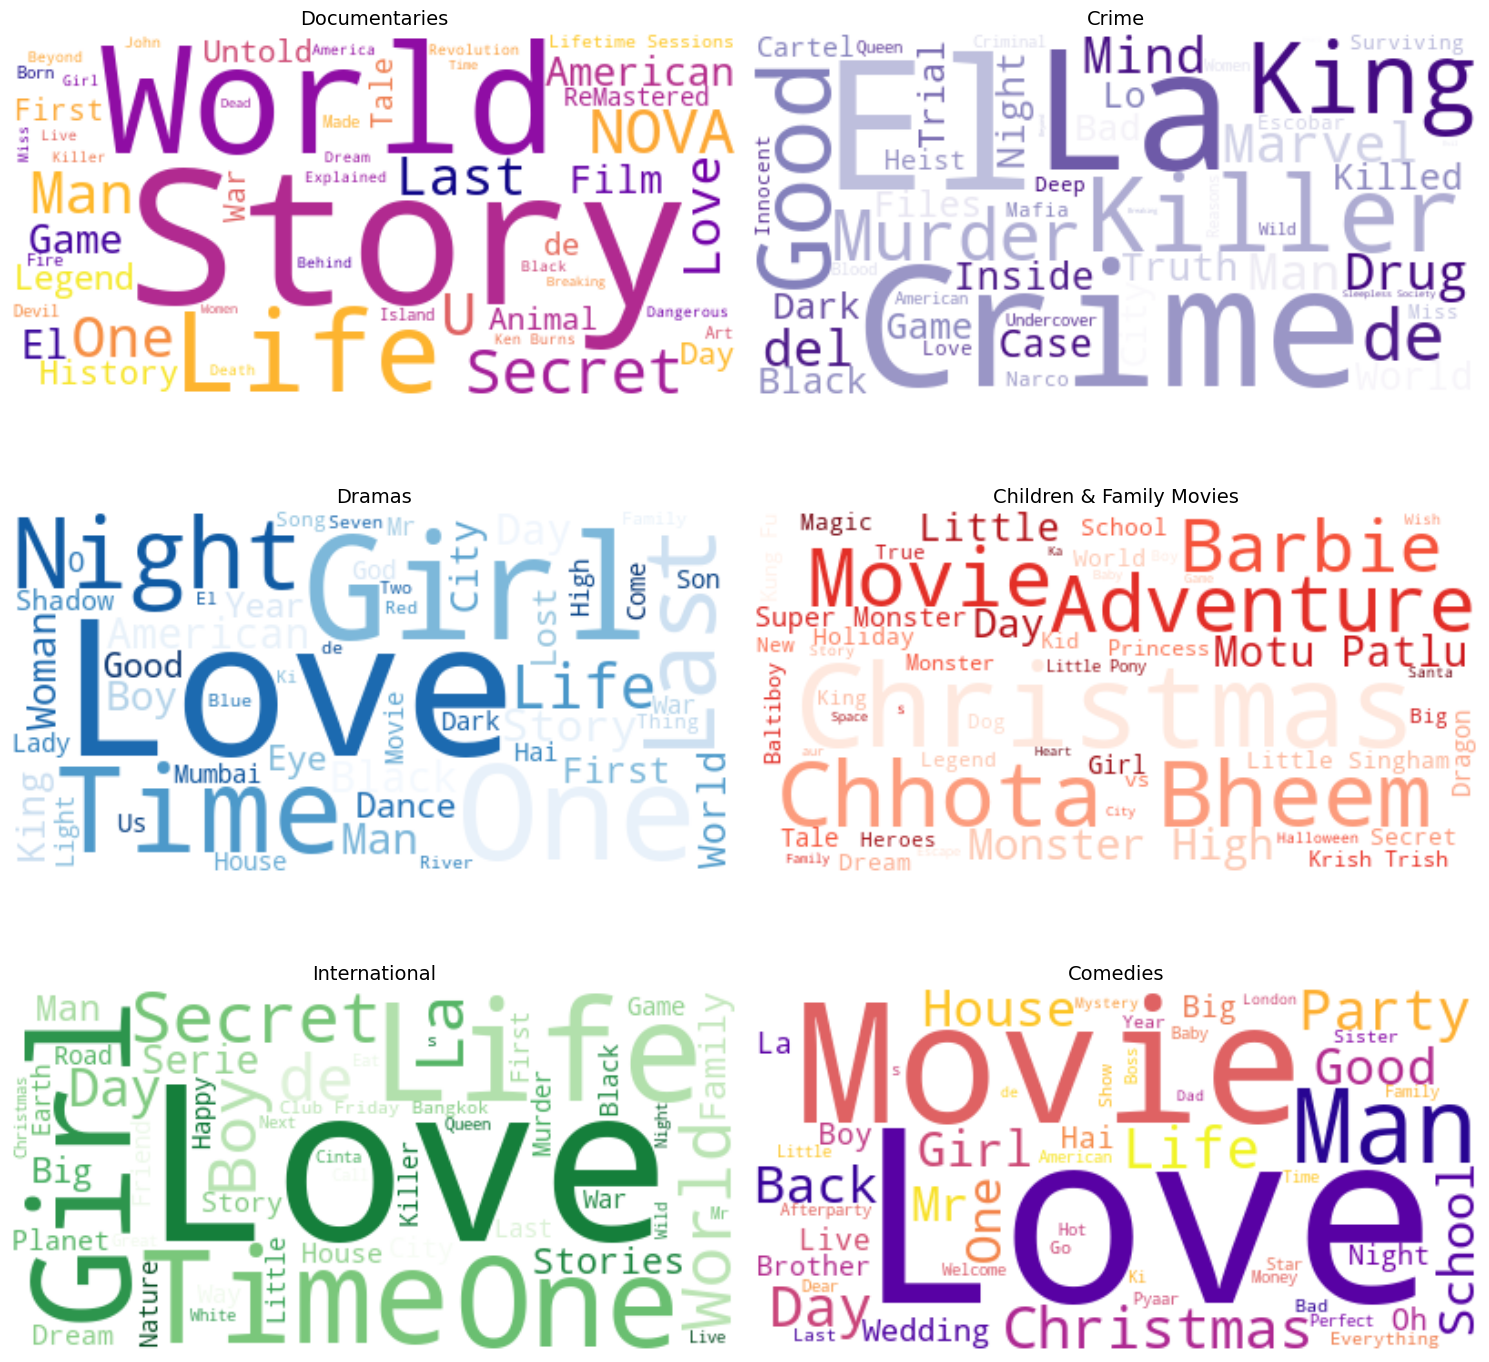

In [64]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Define a short list of colormaps
colormaps = ['plasma', 'Purples', 'Blues', 'Reds', 'Greens']

# Set figure size
plt.figure(figsize=(15, 15))

# Loop through first 6 unique genres only
for i, genre in enumerate(df['main_genre'].dropna().unique()[:6]):
    # Get all titles for this genre
    text = ' '.join(df[df['main_genre'] == genre]['title'].dropna().astype(str))

    # Skip empty text to avoid ValueError
    if not text.strip():
        continue

    plt.subplot(3, 2, i + 1)
    plt.title(genre, fontsize=14)
    
    wordcloud = WordCloud(
        colormap=colormaps[i % len(colormaps)],
        max_words=50,
        background_color='white'
    ).generate(text)

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

plt.tight_layout()
plt.show()


**Step 5: Add Date-Based Analysis**

In [65]:
data['date_added'] = pd.to_datetime(data['date_added'])
print(data['date_added'].dtype)
print(data['date_added'].head())
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month


datetime64[ns]
0   2021-09-25
1   2021-09-24
2   2021-09-24
3   2021-09-22
4   2021-09-24
Name: date_added, dtype: datetime64[ns]


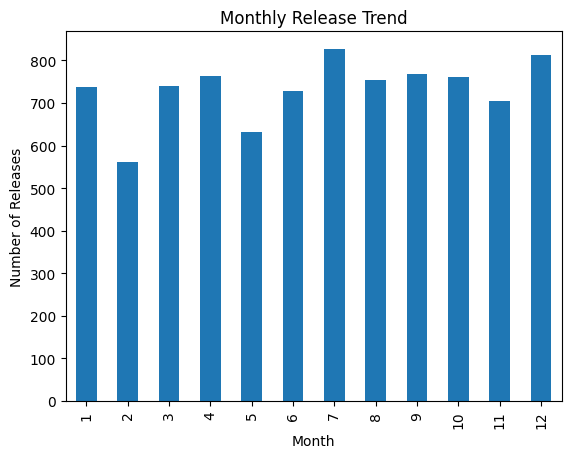

In [66]:
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month

# Monthly release trend
monthly = data['month'].value_counts().sort_index()
monthly.plot(kind='bar')
plt.title("Monthly Release Trend")
plt.xlabel("Month")
plt.ylabel("Number of Releases")
plt.show()


**Step 6: Feature Engineering (Optional for ML)**

In [67]:

# Extract number of genres
data['num_genres'] = data['listed_in'].apply(lambda x: len(x.split(',')))


* Netflix Content Release Over the Years

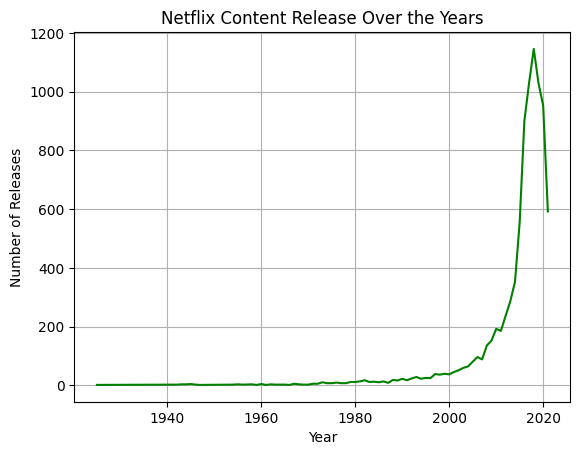

In [68]:
yearly_counts = data['release_year'].value_counts().sort_index()
yearly_counts.plot(kind='line', color='green')
plt.title("Netflix Content Release Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.grid(True)
plt.show()


# APPLYING DEEP LEARNING

**Step 7: Prepare Data for Classification (e.g., Predict Content Type)**

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical to numeric
data_model = data[['rating', 'release_year', 'duration', 'type']].dropna()
le = LabelEncoder()
data_model['rating'] = le.fit_transform(data_model['rating'])
data_model['duration'] = data_model['duration'].str.extract(r'(\d+)').astype(float)

data_model['type'] = le.fit_transform(data_model['type'])  # 0=Movie, 1=TV Show

X = data_model[['rating', 'release_year', 'duration']]
y = data_model['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


**Step 8: Deep Learning Model using Keras**

In [70]:

!pip install tensorflow


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_split=0.2)


C:\Users\NIRNAY\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7963 - loss: 6.6414 - val_accuracy: 0.9972 - val_loss: 0.0258
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9925 - loss: 0.0308 - val_accuracy: 0.9915 - val_loss: 0.0221
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9908 - loss: 0.0346 - val_accuracy: 0.9972 - val_loss: 0.0186
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9929 - loss: 0.0305 - val_accuracy: 0.9979 - val_loss: 0.0390
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9831 - loss: 0.0648 - val_accuracy: 0.9922 - val_loss: 0.0155
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9914 - loss: 0.0321 - val_accuracy: 0.9922 - val_loss: 0.0179
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9926 - loss: 0.0327 - val_accuracy: 0.9979 - val_loss: 0.0088
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9949 - loss: 0.0242 - val_accuracy: 0

* plotting the loss curve


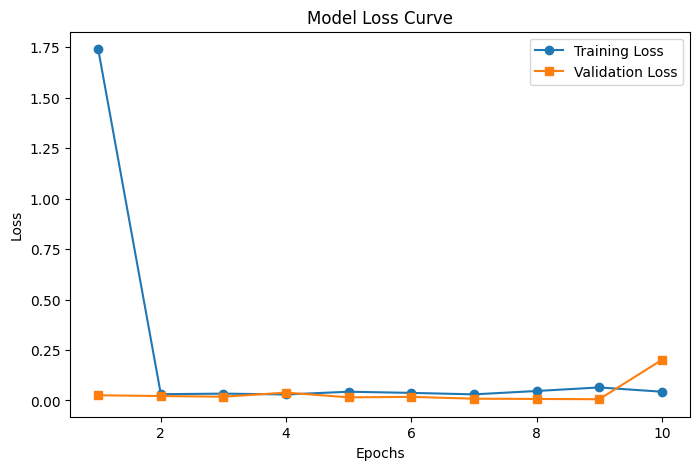

In [72]:
import matplotlib.pyplot as plt

# Get loss values
history = model.history.history
train_loss = history['loss']
val_loss = history['val_loss']

# Plot the loss curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', marker='o')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss Curve')
plt.legend()
plt.show()


# Step 9: Evaluate the Model

In [73]:
from sklearn.metrics.pairwise import cosine_similarity

# Create TF-IDF from description or title
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(data['title'].fillna(""))

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get recommendations
def recommend(title, cosine_sim=cosine_sim):
    idx = data[data['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:6]
    movie_indices = [i[0] for i in sim_scores]
    return data['title'].iloc[movie_indices]

# Example:
recommend("Breaking Bad")


2623    El Camino: A Breaking Bad Movie
4602                      Breaking Free
24                     Bangkok Breaking
4474                           Bad Boys
6034                       The Bad Kids
Name: title, dtype: object

In [74]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9494 - loss: 0.2082
Test Accuracy: 94.99%


# Conclusion
* This project delivers a complete end-to-end data science pipeline for Netflix shows,
from cleaning to EDA to modeling. The deep learning model predicts content type, 
and a basic recommender system provides content suggestions based on title similarity.